<a href="https://colab.research.google.com/github/meoowqt/pythonBigDataLab/blob/main/LW3_MPL_SNS_Vechkanova_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа #3: Статистическая визуализация в Matplotlib и Seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

###Задание 1

Загрузить в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий (либо если такой датасет вам найти сложно, придётся разные датасеты для разных пунктов задания использовать)


In [ ]:
df = pd.read_csv('genshinstats.csv')

df.head()

,Character,Lv,Rarity,Element,Weapon,Main role,Ascension,Base HP,Base ATK,Base DEF,Rating
0,Amber,1,4,Pyro,Bow,Sub DPS,ATK,793,19.0,50.0,1.0
1,Amber,20,4,Pyro,Bow,Sub DPS,ATK,2630,62.0,167.0,1.0
2,Amber,40,4,Pyro,Bow,Sub DPS,ATK,4361,103.0,277.0,1.0
3,Amber,50,4,Pyro,Bow,Sub DPS,ATK,5578,131.0,354.0,1.0
4,Amber,60,4,Pyro,Bow,Sub DPS,ATK,6654,157.0,422.0,1.0


###Задание 2
2.1 Постройте графики с учетом следующих требований:

* Графики должны быть разных типов и хотя бы два из них должны быть связаны с вашим датасетом.
* Подпишите оси
* Во всех графиках подписать название графика
* Хотя бы для одного графика одна из осей должна быть построена в логарифмическом масштабе

1. Построить любой график (любого рода) с помощью чистого matplotlib

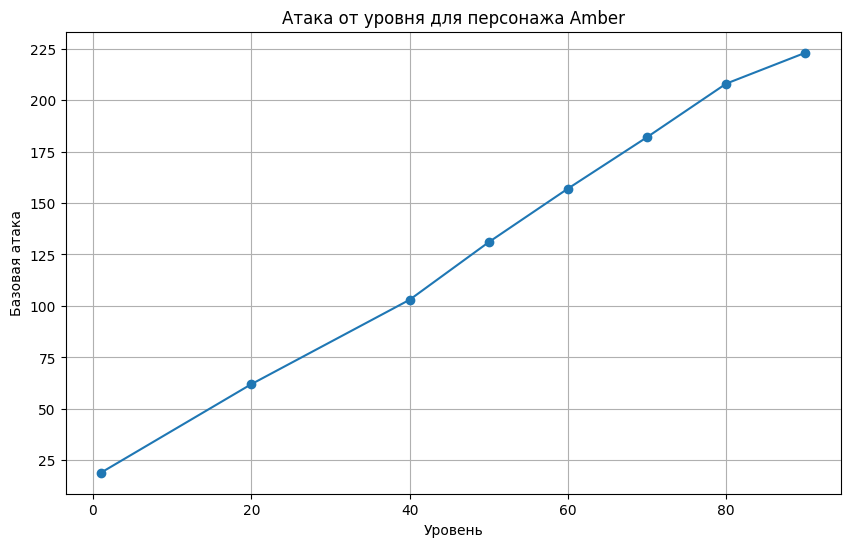

In [ ]:
amber_atk_data = df[df['Character'] == 'Amber']

plt.figure(figsize=(10, 6))
plt.plot(amber_atk_data['Lv'], amber_atk_data['Base ATK'], marker='o', linestyle='-')
plt.xlabel('Уровень')
plt.ylabel('Базовая атака')
plt.title('Атака от уровня для персонажа Amber')
plt.grid(True)
plt.show()

2. Построить несколько суб-графиков на одном графике используя `.subplot`.

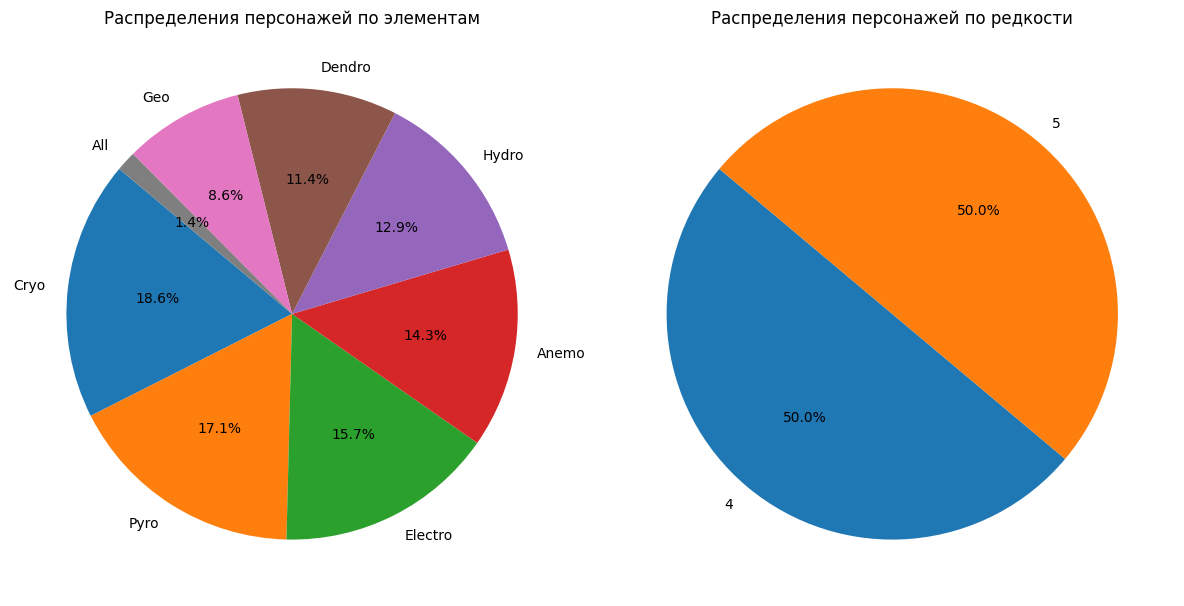

In [ ]:
element_counts = df['Element'].value_counts()
rarity_counts = df['Rarity'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(element_counts, labels=element_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределения персонажей по элементам')

plt.subplot(1, 2, 2)
plt.pie(rarity_counts, labels=rarity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределения персонажей по редкости')

plt.tight_layout()


plt.show()

2.2 На основе Вашего датасета построить три разных вида графиков используя `DataFrame.plot` / `Series.plot`. Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр `by`, для исследования взаимосвязи числовой переменной и какой-либо другой).
Графики должны быть построены как через методы `DataFrame`, так и через методы `Series`. Оба варианта нужно продемонстрировать.

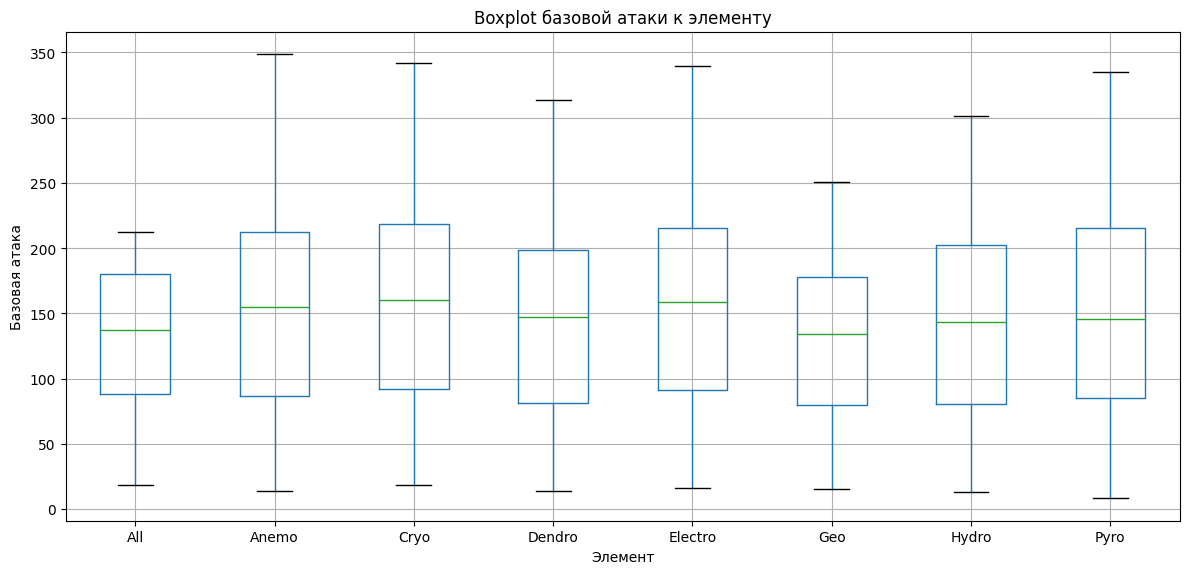

In [ ]:
df.boxplot(column='Base ATK', by='Element', figsize=(12, 6))
plt.title('Boxplot базовой атаки к элементу')
plt.xlabel('Элемент')
plt.ylabel('Базовая атака')
plt.suptitle('')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

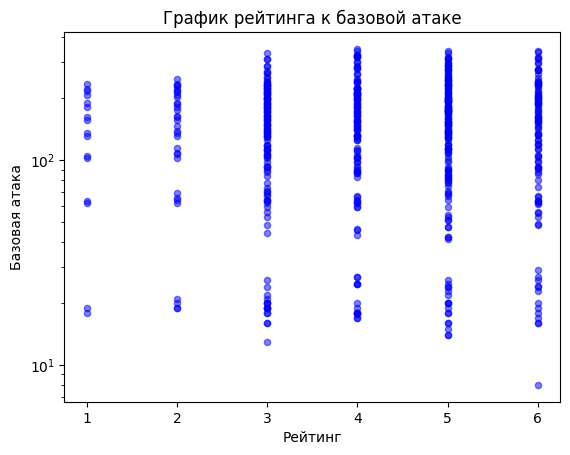

In [ ]:
plt.figure(figsize=(12, 6))
df.plot.scatter(x='Rating', y='Base ATK', color='blue', alpha=0.5)
plt.yscale('log')
plt.title('График рейтинга к базовой атаке')
plt.xlabel('Рейтинг')
plt.ylabel('Базовая атака')
plt.show()

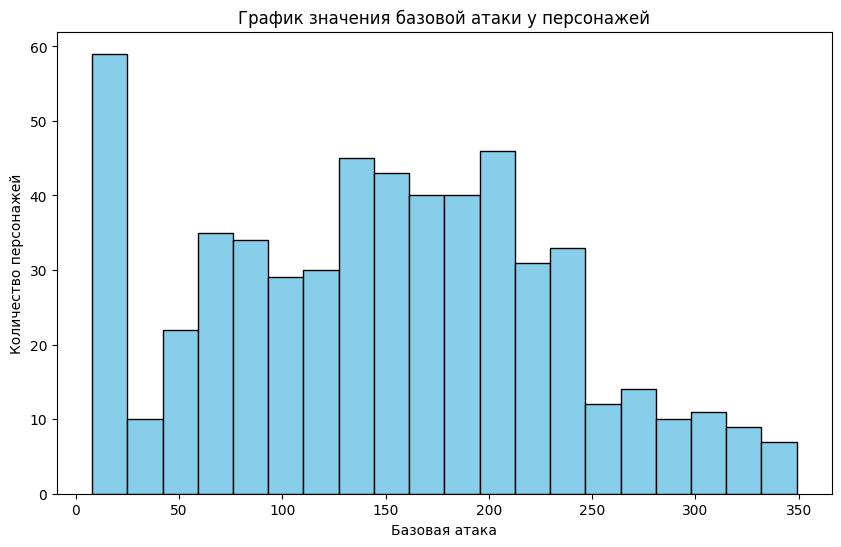

In [ ]:
plt.figure(figsize=(10, 6))
df['Base ATK'].plot.hist(bins=20, color='skyblue', edgecolor='black')
plt.title('График значения базовой атаки у персонажей')
plt.xlabel('Базовая атака')
plt.ylabel('Количество персонажей')
plt.show()

###Задание 3
3.1 Построить `.pairplot` с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

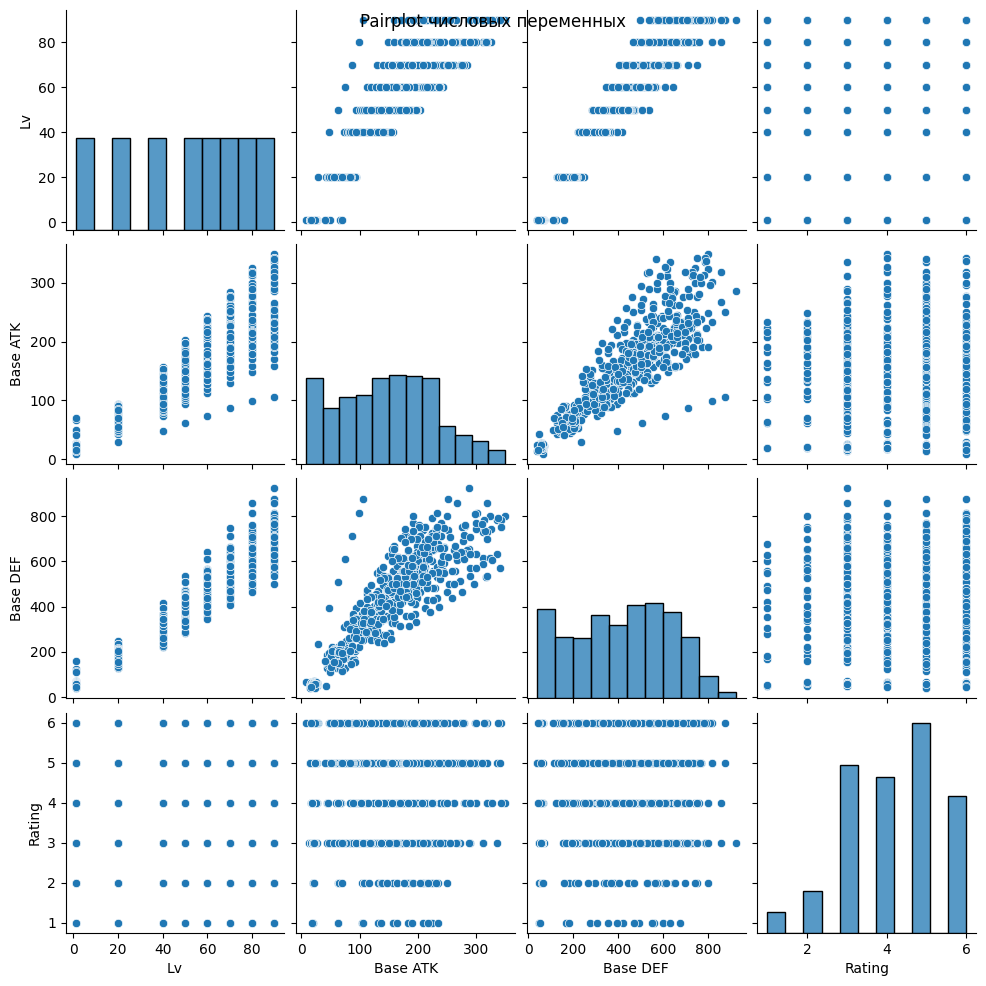

In [ ]:
numerical_features = df[['Lv','Base HP','Base ATK','Base DEF','Rating']]

sns.pairplot(numerical_features)
plt.suptitle('Pairplot числовых переменных')
plt.show()

3.2 Построить `.jointplot`, проанализировав взаимосвязь двух конкретных числовых переменных

<Figure size 800x800 with 0 Axes>

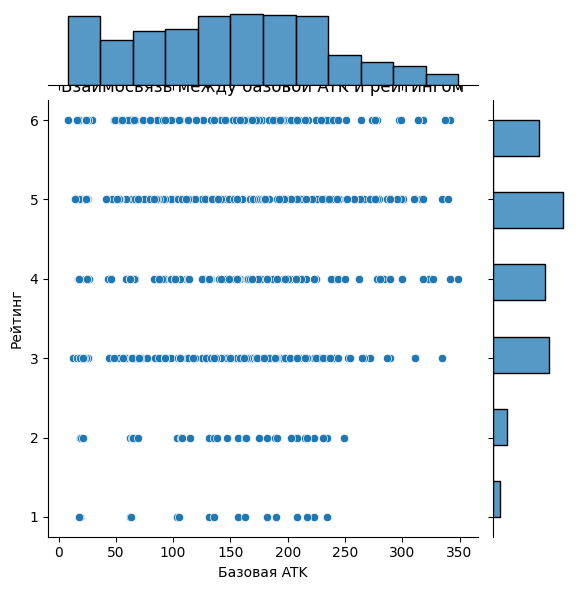

In [ ]:
plt.figure(figsize=(8, 8))
sns.jointplot(x='Base ATK', y='Rating', data=df, kind='scatter')
plt.xlabel('Базовая ATK')
plt.ylabel('Рейтинг')
plt.title('Взаимосвязь между базовой ATK и рейтингом')
plt.show()

3.3 Построить .boxplot или .`violinplot` на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального

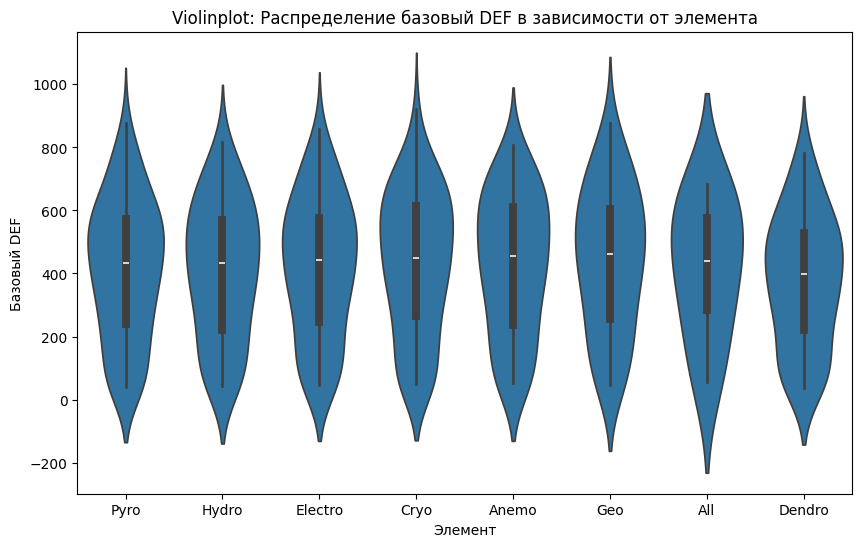

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Element', y='Base DEF', data=df)
plt.xlabel('Элемент')
plt.ylabel('Базовый DEF')
plt.title('Violinplot: Распределение базовый DEF в зависимости от элемента')
plt.show()

3.4 Построить график heatmap попарной корреляции всех числовых признаков (**не категориальных!!!**)

<ipython-input-94-79637e6227ec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


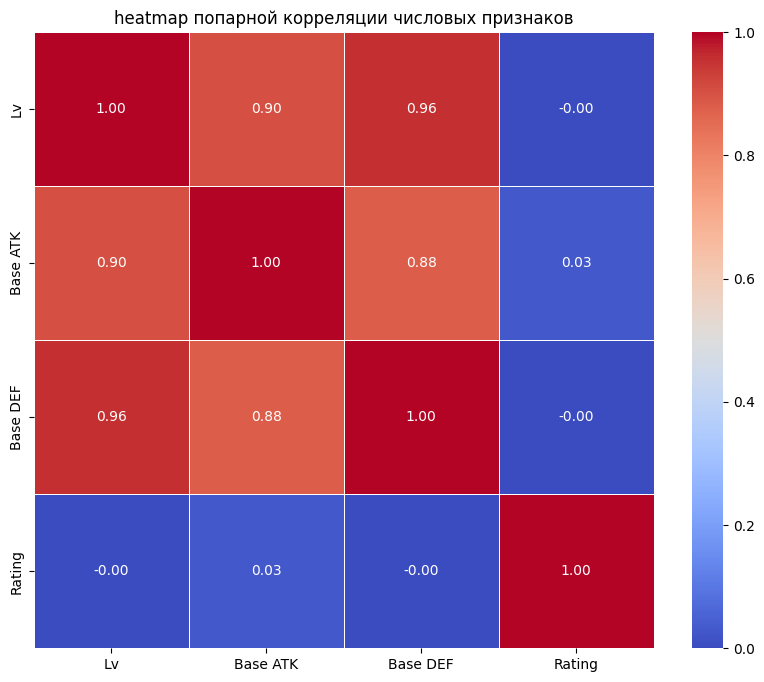

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('heatmap попарной корреляции числовых признаков')
plt.show()